### Context:
Can you differentiate a weed from a crop seedling? <br>
The ability to do so effectively can mean better crop yields and better stewardship of the environment. <br>
The Aarhus University Signal Processing group, in collaboration with University of Southern Denmark, has
recently released a dataset containing images of unique plants belonging to 12 species at several growth stages. <br> 
### Objective:
- Pre-processing of image data.
- Visualization of images.
- Building CNN.
- Evaluate the Model.
### Steps:

1. <a href = #link1>Import the libraries, load dataset, print shape of data, visualize the images in dataset. </a>
2.  <a href = #link2>Data Pre-processing: </a>
-  Normalization.
-  Gaussian Blurring.
-  Visualize data after pre-processing.
3.  <a href = #link3>Make data compatible:  </a>
-  Convert labels to one-hot-vectors.
-  Print the label for y_train[0].
-  Split the dataset into training, testing, and validation set.
(First split images and labels into training and testing set with test_size = 0.3. Then further split test data
into test and validation set with test_size = 0.5)</a>
- Check the shape of data. Reshape data.
4.  <a href = #link4>Build CNN: </a>
-  Define layers
-  Set optimizer and loss function. (Adam optimizer and categorical crossentropy.)
5.  <a href = #link5>Fit and evaluate model and print confusion matrix.</a>
6.  <a href = #link6>Visualize predictions for x_test[2], x_test[3], x_test[33], x_test[36], x_test[59]. </a>

# <a id='link1'>Import the libraries, load dataset, print shape of data, visualize the images in dataset.</a>

In [ ]:
# Import necessary modules.

import pandas as pd
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from tensorflow.keras import datasets, models, layers, optimizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from google.colab.patches import cv2_imshow
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split

In [2]:
#from google.colab import files
#files.upload()

In [ ]:
images = np.load('images.npy')

In [ ]:
#from google.colab import files
files.upload()

Saving Labels.csv to Labels.csv


{'Labels.csv': b'Label\nSmall-flowered Cranesbill\nSmall-flowered Cranesbill\nSmall-flowered Cranesbill\nSmall-flowered Cranesbill\nSmall-flowered Cranesbill\nSmall-flowered Cranesbill\nSmall-flowered Cranesbill\nSmall-flowered Cranesbill\nSmall-flowered Cranesbill\nSmall-flowered Cranesbill\nSmall-flowered Cranesbill\nSmall-flowered Cranesbill\nSmall-flowered Cranesbill\nSmall-flowered Cranesbill\nSmall-flowered Cranesbill\nSmall-flowered Cranesbill\nSmall-flowered Cranesbill\nSmall-flowered Cranesbill\nSmall-flowered Cranesbill\nSmall-flowered Cranesbill\nSmall-flowered Cranesbill\nSmall-flowered Cranesbill\nSmall-flowered Cranesbill\nSmall-flowered Cranesbill\nSmall-flowered Cranesbill\nSmall-flowered Cranesbill\nSmall-flowered Cranesbill\nSmall-flowered Cranesbill\nSmall-flowered Cranesbill\nSmall-flowered Cranesbill\nSmall-flowered Cranesbill\nSmall-flowered Cranesbill\nSmall-flowered Cranesbill\nSmall-flowered Cranesbill\nSmall-flowered Cranesbill\nSmall-flowered Cranesbill\nSmal

In [ ]:
labels = pd.read_csv('Labels.csv')
labels.head()

,Label
0,Small-flowered Cranesbill
1,Small-flowered Cranesbill
2,Small-flowered Cranesbill
3,Small-flowered Cranesbill
4,Small-flowered Cranesbill


In [ ]:
type(images)

numpy.ndarray

In [ ]:
images.ndim

4

In [ ]:
images[0]

array([[[ 35,  52,  78],
        [ 36,  49,  76],
        [ 31,  45,  69],
        ...,
        [ 78,  95, 114],
        [ 76,  93, 110],
        [ 80,  95, 109]],

       [[ 33,  46,  68],
        [ 37,  50,  73],
        [ 48,  65,  83],
        ...,
        [ 81,  96, 113],
        [ 74,  89, 105],
        [ 83,  95, 109]],

       [[ 34,  50,  68],
        [ 35,  52,  72],
        [ 70,  85, 101],
        ...,
        [ 83,  97, 112],
        [ 79,  94, 108],
        [ 79,  94, 107]],

       ...,

       [[ 35,  50,  69],
        [ 42,  57,  73],
        [ 42,  57,  72],
        ...,
        [ 60,  76,  92],
        [ 67,  81,  97],
        [ 64,  77,  95]],

       [[ 36,  52,  67],
        [ 48,  63,  78],
        [ 41,  57,  73],
        ...,
        [ 44,  66,  83],
        [ 58,  76,  91],
        [ 57,  74,  90]],

       [[ 44,  58,  70],
        [ 43,  57,  73],
        [ 40,  55,  72],
        ...,
        [ 41,  70,  92],
        [ 55,  78,  97],
        [ 61,  79,  96]]

In [ ]:
# Print the shape of dataset.
print('images shape:', images.shape)
print(images.shape[0], 'images samples')

images shape: (4750, 128, 128, 3)
4750 images samples


In [ ]:
# Print the shape of dataset.
print('labels shape:', labels.shape)

labels shape: (4750, 1)


The images dataset contains 4750 images.
The size of each image is 128x128 pixels.
Each image has 3 color channels.

In [ ]:
labels.head(1) #The label of image at index = 0 is "Small-flowered Cranesbill".

,Label
0,Small-flowered Cranesbill


In [ ]:
labels.value_counts()

Label                    
Loose Silky-bent             654
Common Chickweed             611
Scentless Mayweed            516
Small-flowered Cranesbill    496
Fat Hen                      475
Charlock                     390
Sugar beet                   385
Cleavers                     287
Black-grass                  263
Shepherds Purse              231
Maize                        221
Common wheat                 221
dtype: int64

In [ ]:
labels.info() # no missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4750 entries, 0 to 4749
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Label   4750 non-null   object
dtypes: object(1)
memory usage: 37.2+ KB


The labels dataset contains 4750 labels.

Label 
 Label Id: Small-flowered Cranesbill 
 Name: Small-flowered Cranesbill


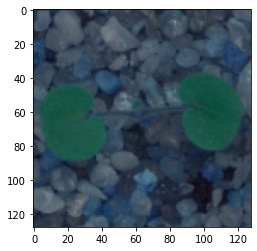

In [ ]:
#Visualizing an image from the dataset:
labels_nd = labels.values
type(labels_nd)
i = 0
image = images[i]
label = labels_nd[i][0]
print(f'Label \n Label Id: {label} \n Name: {label}')
plt.imshow(image);

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


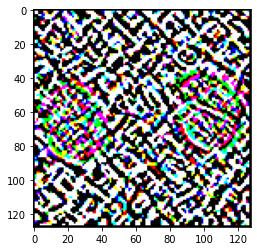

In [ ]:
sobel = cv2.Sobel(image, cv2.CV_64F, 1, 1, ksize=5)
plt.imshow(sobel)

We can see edges of the plant.

# <a id='link2'> Data Pre-processing </a>


### Normalization:
Normalizing the data by dividing the RGB codes with 255 (maximum RGB code minus the minimum RGB code). Also making sure that the values are float so that we can get decimal points after division

In [ ]:
images_n = images.astype('float32')
images_n /= 255

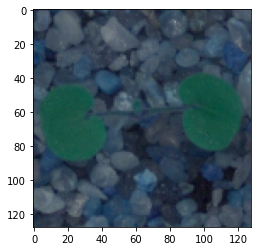

In [ ]:
i = 0
image_n = images_n[i]
plt.imshow(image_n);

In [ ]:
#Comparing original data shape and values to the normalized data:
print ('***original data***')
print("images shape:", images.shape)
print("Images in images:", images.shape[0])
print("Max value in images:", images.max())
print("Min value in images:", images.min())
print ('***normalized data***')
print("images_n shape:", images_n.shape)
print("Images in images_n:", images_n.shape[0])
print("Max value in images_n:", images_n.max())
print("Min value in images_n:", images_n.min())

***original data***
images shape: (4750, 128, 128, 3)
Images in images: 4750
Max value in images: 255
Min value in images: 0
***normalized data***
images_n shape: (4750, 128, 128, 3)
Images in images_n: 4750
Max value in images_n: 1.0
Min value in images_n: 0.0


### Gaussian blurring:

Original Image:


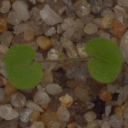

Output after grayscale conversion:


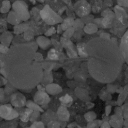

In [ ]:
# Convert image to grayscale. The second argument in the following step is cv2.COLOR_BGR2GRAY, which converts colour image to grayscale.
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
print("Original Image:")
cv2_imshow(image)
print("Output after grayscale conversion:")
cv2_imshow(gray)

### Visualize data after pre-processing:

Original Image:



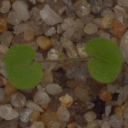


 Output after first gaussian blurring: 



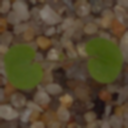


 Output after second gaussian blurring: 



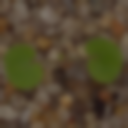

In [ ]:
Gaussian1 = cv2.GaussianBlur(image, (5, 5), 0)
Gaussian2 = cv2.GaussianBlur(image, (15, 15), 0)
print('Original Image:\n')
cv2_imshow(image)
print('\n Output after first gaussian blurring: \n')
cv2_imshow(Gaussian1)
print('\n Output after second gaussian blurring: \n')
cv2_imshow(Gaussian2)

### Note: 
The image looks smoother after the application of the Gaussian Blurring filter as the noise has been reduced.



 Output after applying grayscale (normalized): 



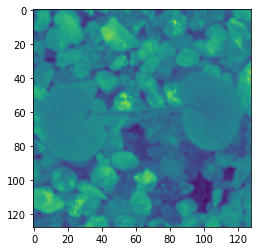

In [ ]:
gray_n = cv2.cvtColor(image_n, cv2.COLOR_BGR2GRAY)
print('\n Output after applying grayscale (normalized): \n')
plt.imshow(gray_n);


 Output after first gaussian blurring (normalized): 



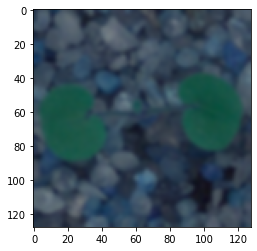

In [ ]:
Gaussian1_n = cv2.GaussianBlur(image_n, (5, 5), 0)
print('\n Output after first gaussian blurring (normalized): \n')
plt.imshow(Gaussian1_n)


 Output after second gaussian blurring (normalized): 



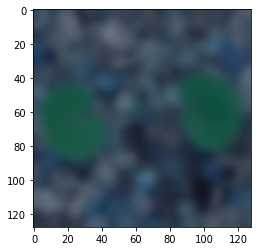

In [ ]:
Gaussian2_n = cv2.GaussianBlur(image_n, (15, 15), 0)
print('\n Output after second gaussian blurring (normalized): \n')
plt.imshow(Gaussian2_n)

Plotting histograms of various images: original, grayscale, gaussian smoothed) to show pixel values. 
The histograms show range of pixel values. The pixel values are represented on x-axis. The number count of corresponding pixels are on the y-axis.

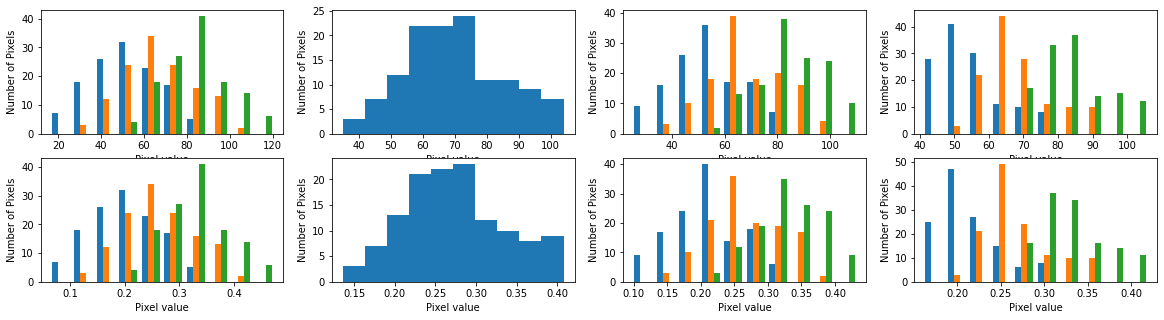

In [ ]:
plt.figure(figsize= (20,5))
pos = 1 
for i in [image, gray,Gaussian1, Gaussian2, 
          image_n, gray_n, Gaussian1_n, Gaussian2_n]:
    plt.subplot(2, 4, pos)
    plt.hist(i[0])
    plt.xlabel('Pixel value')
    plt.ylabel('Number of Pixels')
    pos+= 1

There are 3 color channels that are depicted on the histograms above (excluding gray and gray_n). <br>
The distributions of color channels of the original images appear to approximately follow the normal distribution curve. When comparing Gaussian1_n and Gaussian 2_n, Gaussian2_n color channels distributions start looking more skewed to the right meaning the pixel values tend to be closer to 0 (Zero value represents a black pixel). 
From the image above, Gaussian2_n produced a darker image.


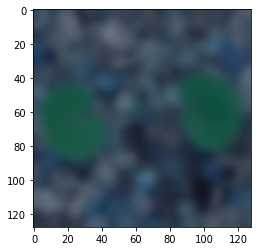

In [ ]:
#Applying Gaussian2 blurring the whole dataset:
X = np.empty((4750, 128, 128,3)) 
for idx, img in enumerate(images_n):
  X[idx] = cv2.GaussianBlur(img, (15, 15), 0)
plt.imshow(X[0]) # show the first image

In [ ]:
print ('***normalized data with GaussianBlur***')
print("X shape:", X.shape)
print("Images in X:", X.shape[0])
print("Max value in X:", X.max())
print("Min value in X:", X.min())

***normalized data with GaussianBlur***
X shape: (4750, 128, 128, 3)
Images in X: 4750
Max value in X: 0.9731791615486145
Min value in X: 0.0


# <a id='link3'> Make data compatible: </a>

### Convert labels to one-hot-vectors.

In [ ]:
labels_nd = labels.values
type(labels_nd)

numpy.ndarray

In [ ]:
# Convert labels to one hot vectors.
enc = LabelBinarizer()
labels_nd = enc.fit_transform(labels_nd)

###Print the label for y_train[0].

In [ ]:
labels_nd[0]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0])

### Split the dataset into training, testing, and validation set. 

In [ ]:

X_train, X_test, y_train, y_test = train_test_split(X, labels_nd, train_size=0.70, random_state=0)

In [ ]:
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5, random_state=1)

### Check the shape of data. Reshape data if needed.


In [ ]:
print(y_train.shape)
print(y_test.shape)
print(y_val.shape)

(3325, 12)
(712, 12)
(713, 12)


In [ ]:
print(X_train.shape)
print(X_test.shape)
print(X_val.shape)

(3325, 128, 128, 3)
(712, 128, 128, 3)
(713, 128, 128, 3)


Data is in compatible shape with Keras models.

 # <a id='link4'> Build CNN: </a>
-  Define layers
-  Set optimizer and loss function. (Adam optimizer and categorical crossentropy.)

In [ ]:
# Set the batch size, number of epochs.
batch_size = 32
num_classes = 12
epochs = 10
num_predictions = 20

In [ ]:
# Set the CNN model

batch_size = None

model = models.Sequential()
model.add(layers.Conv2D(128, (5, 5), padding='same', activation="relu", input_shape=X_train.shape[1:]))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.2))
model.add(layers.Conv2D(256, (5, 5), padding='same', activation="relu"))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.3))
model.add(layers.Conv2D(256, (3, 3), padding='same', activation="relu"))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.4))
model.add(layers.Conv2D(256, (3, 3), padding='same', activation="relu"))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.5))

model.add(layers.GlobalMaxPooling2D())
model.add(layers.Dense(256, activation="relu"))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(12, activation="softmax"))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 128, 128, 128)     9728      
_________________________________________________________________
batch_normalization (BatchNo (None, 128, 128, 128)     512       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 64, 64, 128)       0         
_________________________________________________________________
dropout (Dropout)            (None, 64, 64, 128)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 64, 64, 256)       819456    
_________________________________________________________________
batch_normalization_1 (Batch (None, 64, 64, 256)       1024      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 32, 32, 256)       0

In [ ]:
# initiate Adam optimizer
opt = optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08)

In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 128, 128, 128)     9728      
_________________________________________________________________
batch_normalization (BatchNo (None, 128, 128, 128)     512       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 64, 64, 128)       0         
_________________________________________________________________
dropout (Dropout)            (None, 64, 64, 128)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 64, 64, 256)       819456    
_________________________________________________________________
batch_normalization_1 (Batch (None, 64, 64, 256)       1024      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 32, 32, 256)       0

In [ ]:
#Adding Early stopping callback to the fit function is going to stop the training,
#if the val_loss is not going to change even '0.001' for more than 10 continous epochs

early_stopping = EarlyStopping(monitor='val_loss', min_delta=0.001, patience=10)

#Adding Model Checkpoint callback to the fit function is going to save the weights whenever val_loss achieves a new low value. 
#Hence saving the best weights occurred during training

model_checkpoint =  ModelCheckpoint('cifar_cnn_checkpoint_{epoch:02d}_loss{val_loss:.4f}.h5',
                                                           monitor='val_loss',
                                                           verbose=1,
                                                           save_best_only=True,
                                                           save_weights_only=True,
                                                           mode='auto',
                                                           period=1)

# <a id='link6'> Fit and evaluate model and print confusion matrix. </a>

Epoch 1/10
104/104 [==============================] - 1979s 19s/step - loss: 3.8060 - accuracy: 0.2099 - val_loss: 3.2647 - val_accuracy: 0.1250

Epoch 00001: val_loss improved from inf to 3.26470, saving model to cifar_cnn_checkpoint_01_loss3.2647.h5
Epoch 2/10
104/104 [==============================] - 1980s 19s/step - loss: 1.9210 - accuracy: 0.3299 - val_loss: 3.1938 - val_accuracy: 0.1250

Epoch 00002: val_loss improved from 3.26470 to 3.19385, saving model to cifar_cnn_checkpoint_02_loss3.1938.h5
Epoch 3/10
104/104 [==============================] - 2015s 19s/step - loss: 1.6851 - accuracy: 0.4126 - val_loss: 3.2794 - val_accuracy: 0.1250

Epoch 00003: val_loss did not improve from 3.19385
Epoch 4/10
104/104 [==============================] - 2016s 19s/step - loss: 1.5157 - accuracy: 0.4731 - val_loss: 2.2732 - val_accuracy: 0.2711

Epoch 00004: val_loss improved from 3.19385 to 2.27319, saving model to cifar_cnn_checkpoint_04_loss2.2732.h5
Epoch 5/10
104/104 [===================

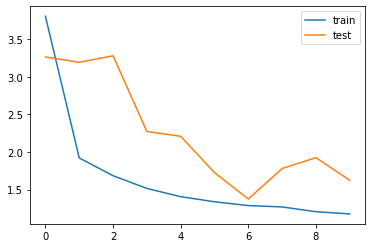

In [ ]:
history = model.fit(X_train,
                    y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    validation_data=(X_test, y_test),
                    shuffle=True,
                    verbose=1,
                    callbacks=[early_stopping,model_checkpoint])

# plot training history
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

In [ ]:
model.save('model.i1')

INFO:tensorflow:Assets written to: model.i1/assets


In [ ]:
# Score trained model.
scores = model.evaluate(X_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

23/23 [==============================] - 104s 5s/step - loss: 1.6244 - accuracy: 0.4522
Test loss: 1.6243810653686523
Test accuracy: 0.4522472023963928


The test accuracy score shows only 0.45. The number of epochs used is 10 (to reduce processing time). It is worth improving the model going forward by increasing the number of epochs and tuning hyperparameters.

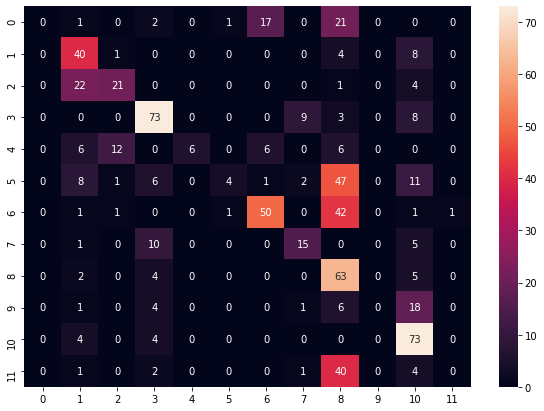

In [ ]:
Y_pred = model.predict(X_val)
# Convert predictions classes to one hot vectors 
result = np.argmax(Y_pred, axis=1)
# Convert validation observations to one hot vectors
Y_true = np.argmax(y_val, axis=1)

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

conf_mat = confusion_matrix(Y_true, result)

df_cm = pd.DataFrame(conf_mat, index = [i for i in range(0, 12)],
                  columns = [i for i in range(0, 12)])
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True, fmt='g');


The confusion matrix shows that amongs best predicted classes are 1,2,3,5,8 and 10. Classes 0,9, and 11 were not predicted correctly at all. 0 was misclassified as 6 and 8, 9 was misclassifies as 10 and 11 was misclassified as 8 quite often.

 # <a id='link7'> Visualize predictions for x_test[2], x_test[3], x_test[33], x_test[36], x_test[59]. </a>


In [ ]:
img_path2 = np.expand_dims(img_path2, axis=0)

classes2 = model.predict_classes(img_path2, batch_size=10)
print (classes2)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


[3]


In [ ]:
y_test[2]

array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0])

(128, 128, 3)


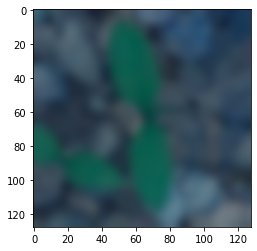

In [ ]:
img_path2 = X_test[2]  
print(img_path2.shape)
plt.imshow(img_path2)
plt.show()

X_test[2] is correctly predicted by the model as label 3.

In [ ]:
img_path3 = np.expand_dims(img_path3, axis=0)

classes3 = model.predict_classes(img_path3, batch_size=10)
print (classes3)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


[8]


In [ ]:
y_test[3]

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0])

(128, 128, 3)


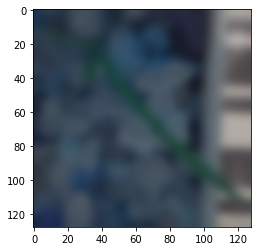

In [ ]:
img_path3 = X_test[3]  
print(img_path3.shape)
plt.imshow(img_path3)
plt.show()

X_test 3 is incorrectly predicted by the model as label 8. In fact, it is label 6.

In [ ]:
img_path33 = np.expand_dims(img_path33, axis=0)

classes33 = model.predict_classes(img_path33, batch_size=10)
print (classes33)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


[8]


In [ ]:
y_test[33]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0])

(128, 128, 3)


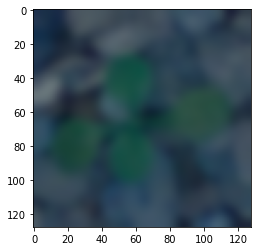

In [ ]:
img_path33 = X_test[33]  
print(img_path33.shape)
plt.imshow(img_path33)
plt.show()

X_test[33] is incorrectly predicted by the model as label 8. In fact, it is label 9.

In [ ]:
img_path36 = np.expand_dims(img_path36, axis=0)

classes36 = model.predict_classes(img_path36, batch_size=10)
print (classes36)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


[3]


In [ ]:
y_test[36]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0])

(128, 128, 3)


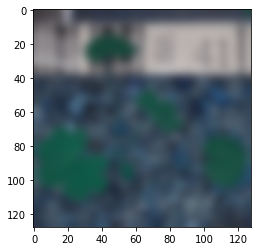

In [ ]:
img_path36 = X_test[36]  
print(img_path36.shape)
plt.imshow(img_path36)
plt.show()

X_test[36] is incorrectly predicted by the model as label 3. In fact, it is label 10.

In [ ]:
img_path59 = np.expand_dims(img_path59, axis=0)

classes59 = model.predict_classes(img_path59, batch_size=10)
print (classes59)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


[8]


In [ ]:
y_test[59]

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0])

(128, 128, 3)


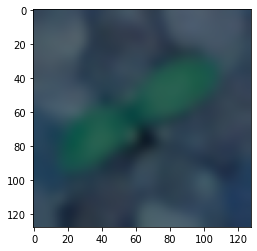

In [ ]:
img_path59 = X_test[59]  
print(img_path59.shape)
plt.imshow(img_path59)
plt.show()

X_test[59] is correctly predicted by the model as label 8. 